<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png" align="right"><br><br><FONT FACE="times new roman" SIZE=5>

<i><b>
<center>
Parcial Final
<br>
<i><b>Ingeniero</b></i> 
<br>
<i><b>Bryan Hernandez
<br>
<i><b>Docente:</b></i> John Corredor, PhD.
<br>
<i><b>Asignatura:</b></i> Metricas de rendimiento - HPC
<br>
22/11/22
<br>
</FONT>
</div>

### EDA

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
## Se importa los modulos necesarios para el analisis de datos y graficos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score


*El dataset usado es framingham en cual tiene los datos de pacientes que presentan alguna posibilidad de tener el Riesgo en 10 años de cardiopatía coronaria, esta informacion tambien fue sacada mediante la pagina OMS(Organizacion Mundial De La Salud) para generar el dataset.* [Heart Diese](https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression?select=framingham.csv).

In [38]:
## Se importa el archivo csv
heart= pd.read_csv('framingham.csv')

In [39]:
## Se importa observan las primeras 5 filas del archivo
heart.head(5)


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [40]:
# Tamaño del dataset
heart.shape

(4238, 16)

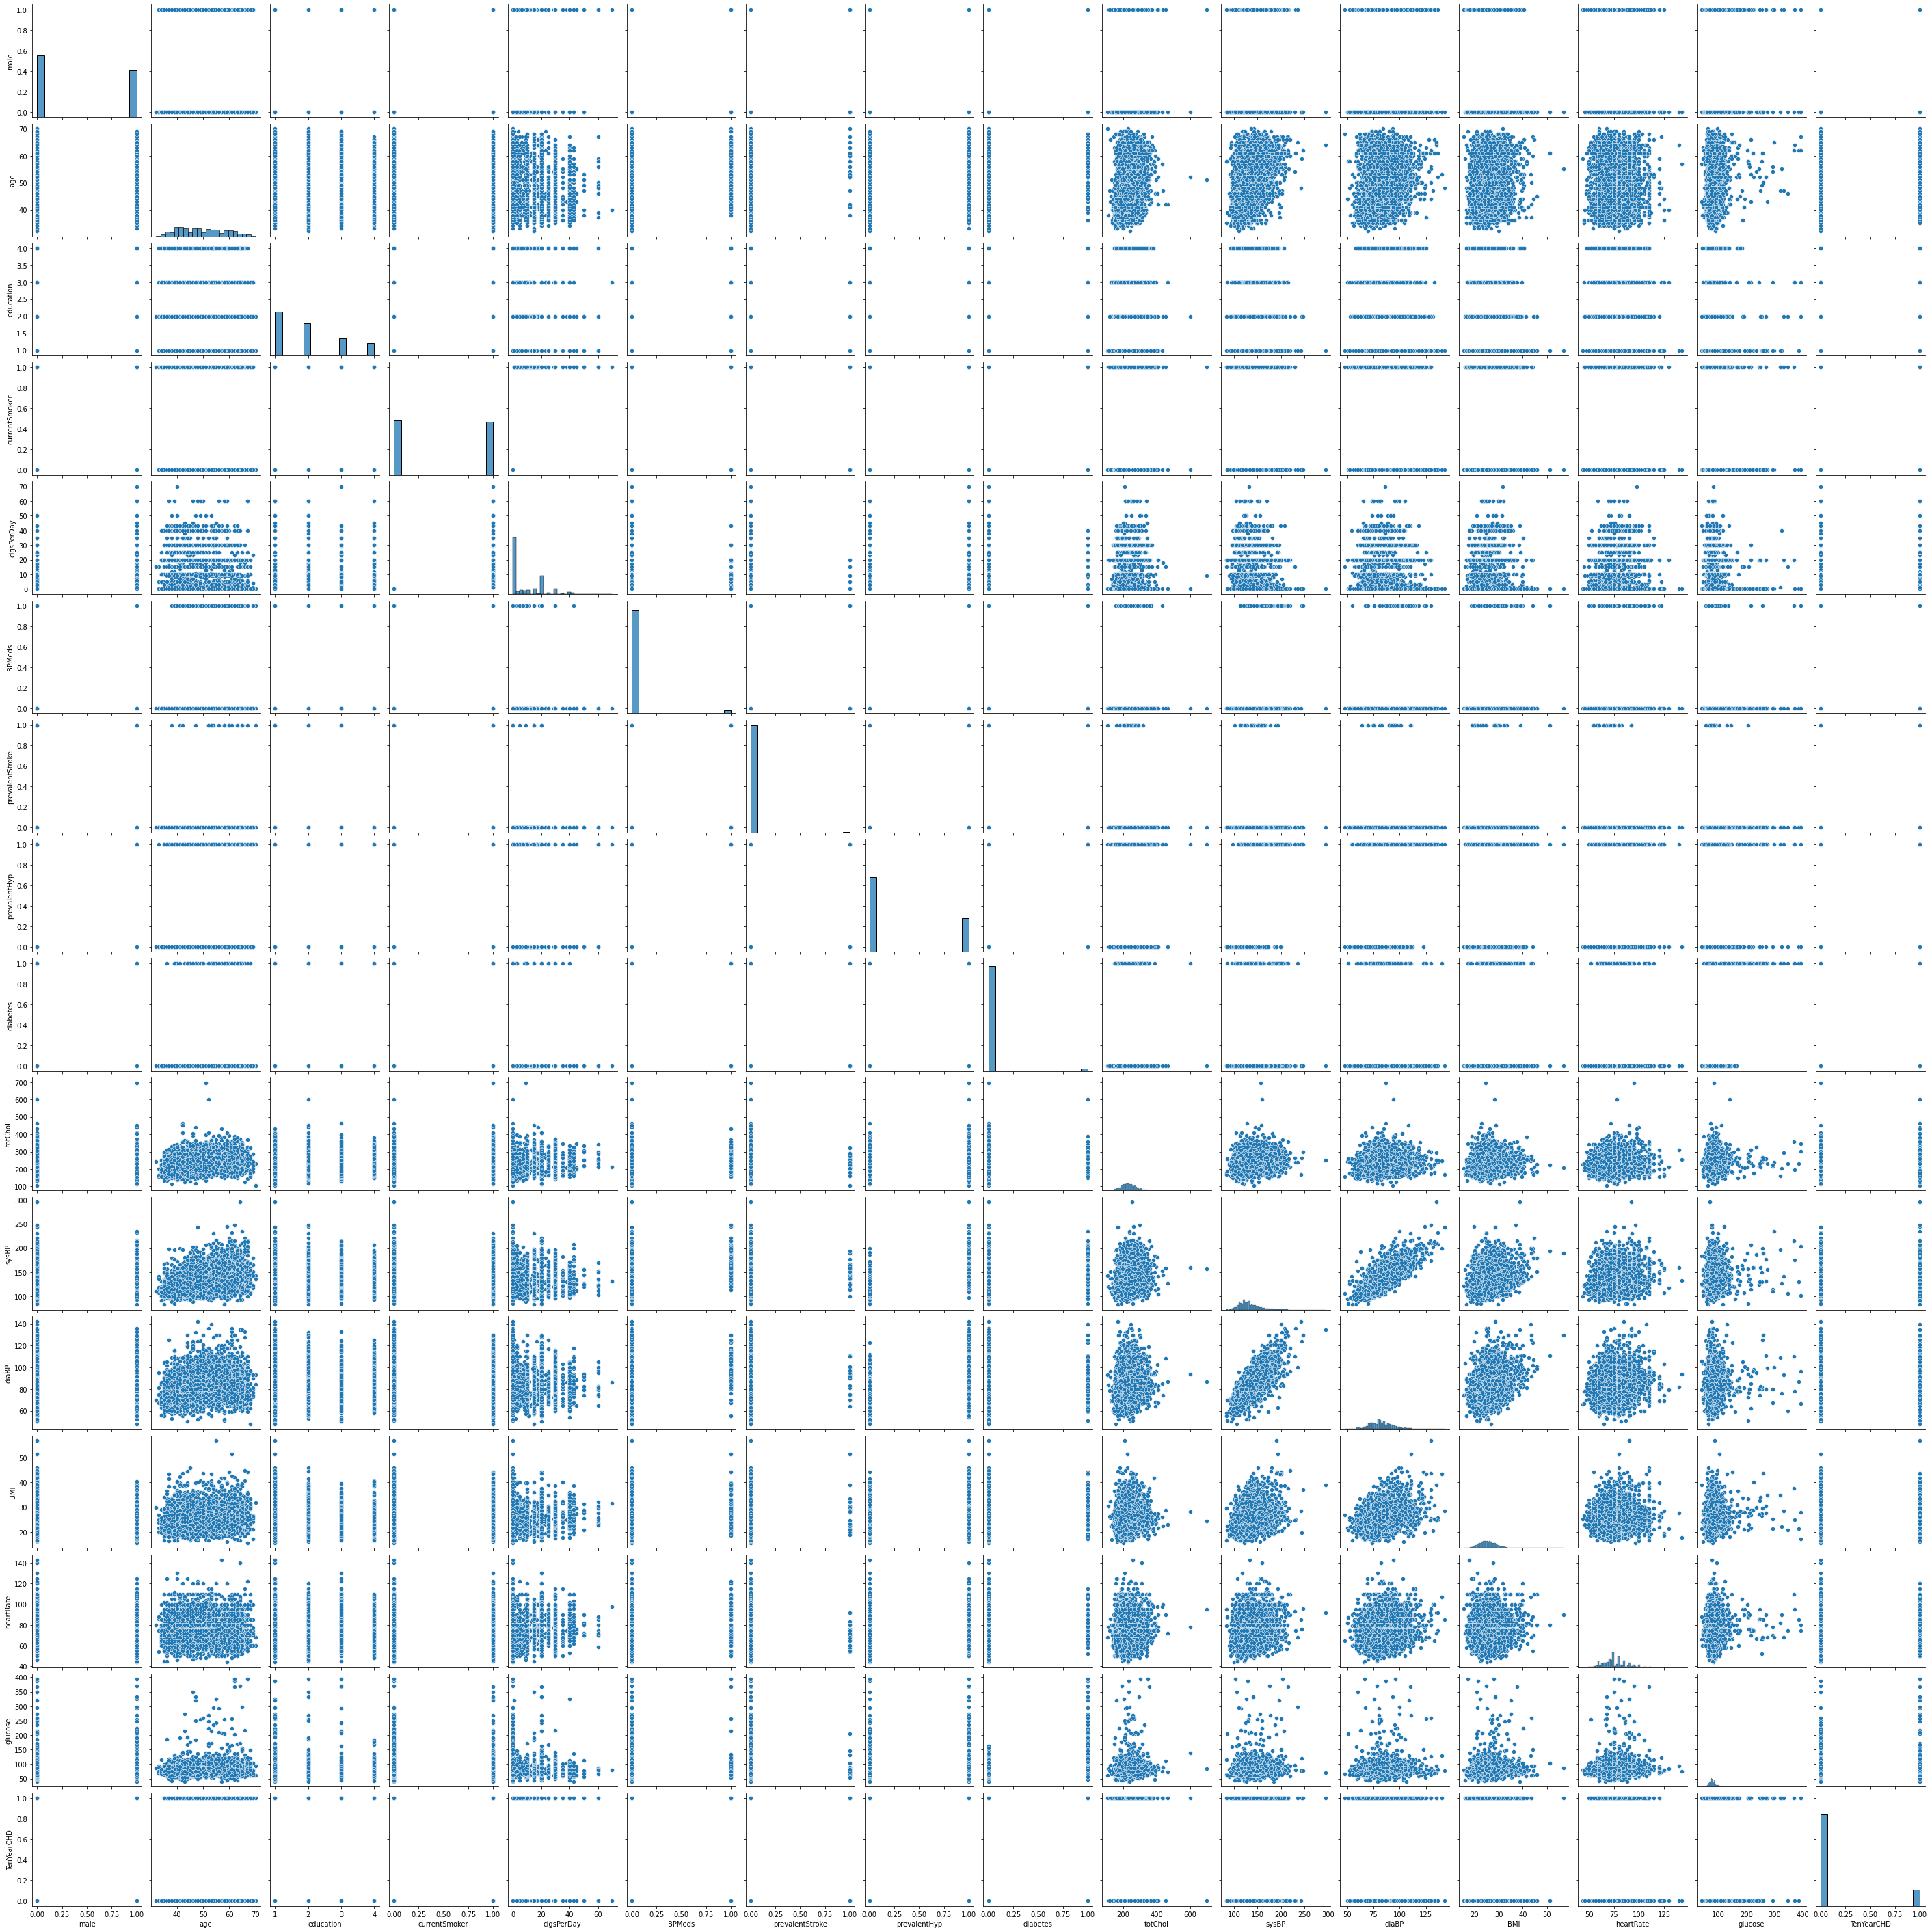

In [41]:
## grafica de relacion de variables
sns.pairplot(heart)


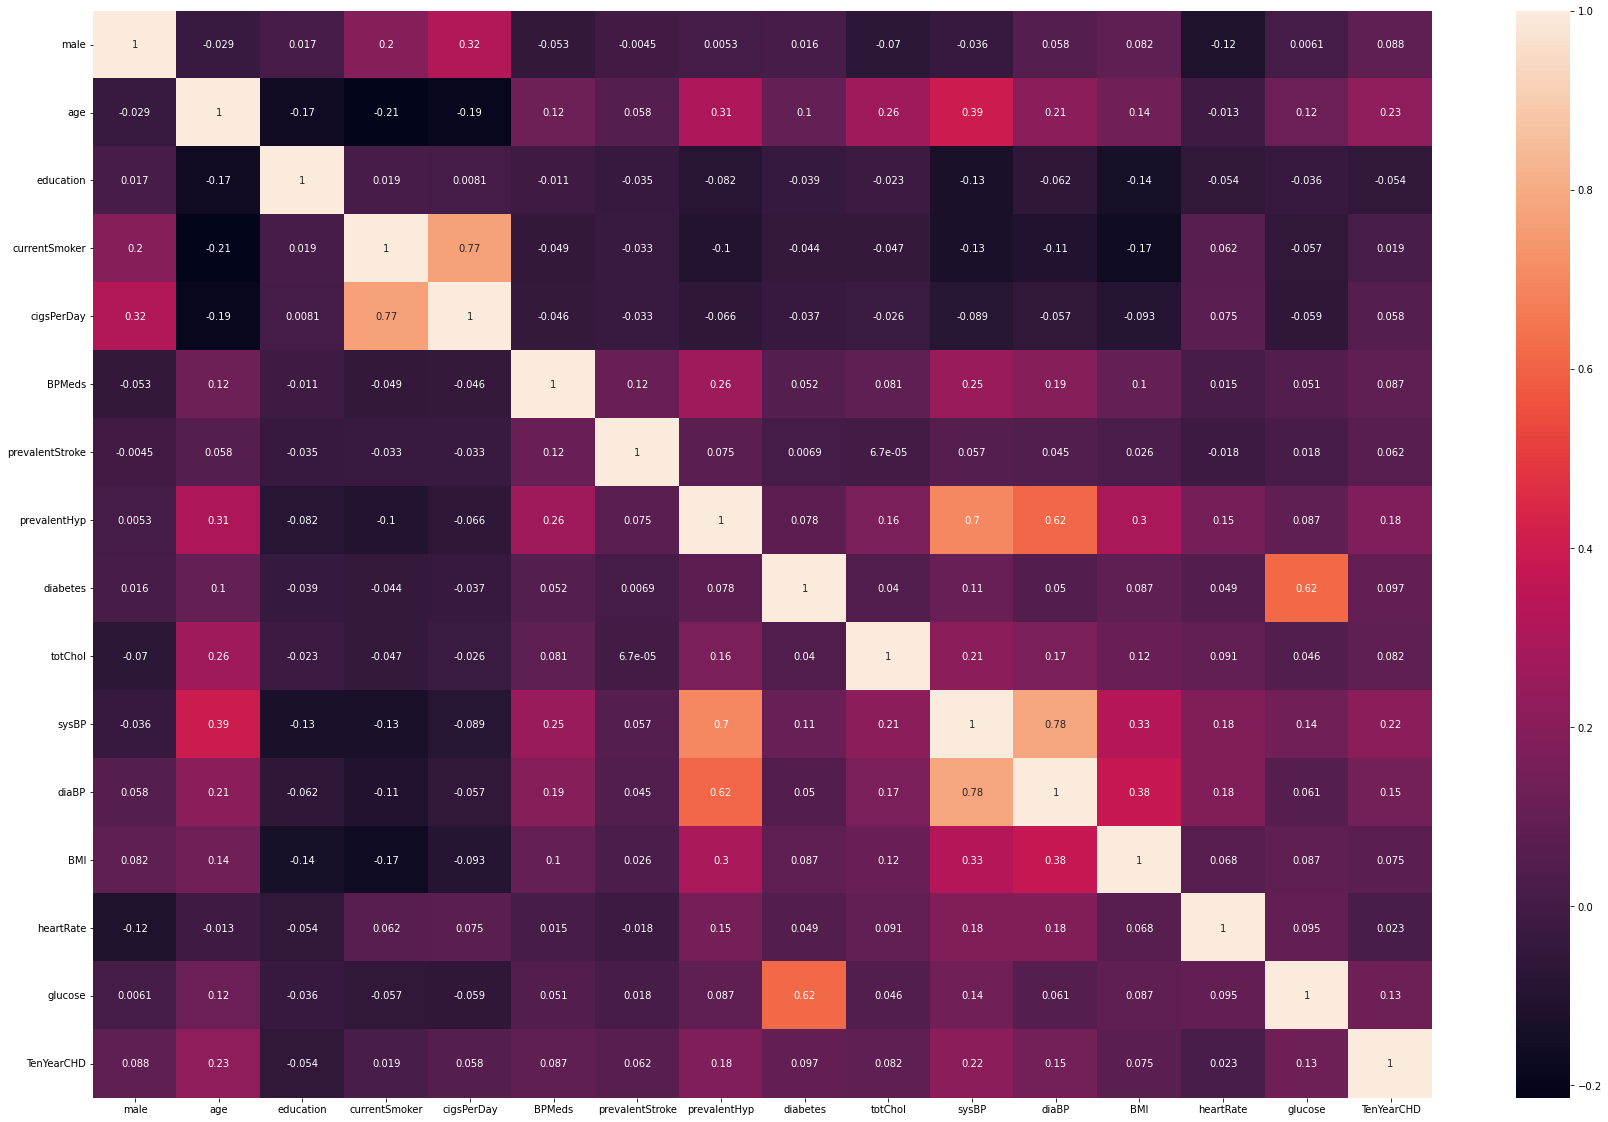

In [42]:
## grafica correlacion de variables
corr_heart= heart.corr(method='pearson')
plt.figure(figsize=(30,20))
sns.heatmap(corr_heart , annot= True)
plt.show()

In [43]:
## grafica correlacion de variables
corr_heart01 =  heart.corr(method='pearson')
corr_heart01.style.background_gradient(cmap='coolwarm')

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.028979,0.017352,0.197596,0.317930,-0.052506,-0.004546,0.005313,0.015708,-0.070322,-0.035989,0.057933,0.081672,-0.116620,0.006083,0.088428
age,-0.028979,1.000000,-0.165883,-0.213748,-0.192791,0.122995,0.057655,0.307194,0.101258,0.262131,0.394302,0.206104,0.135800,-0.012823,0.122256,0.225256
education,0.017352,-0.165883,1.000000,0.018532,0.008085,-0.010815,-0.035112,-0.081970,-0.038680,-0.023115,-0.129631,-0.062316,-0.137504,-0.054206,-0.035721,-0.054059
currentSmoker,0.197596,-0.213748,0.018532,1.000000,0.769690,-0.048938,-0.032988,-0.103260,-0.044295,-0.046562,-0.130230,-0.107746,-0.167650,0.062356,-0.056826,0.019456
cigsPerDay,0.317930,-0.192791,0.008085,0.769690,1.000000,-0.046134,-0.032707,-0.066146,-0.037067,-0.026320,-0.088780,-0.056632,-0.092856,0.075157,-0.058960,0.057884
BPMeds,-0.052506,0.122995,-0.010815,-0.048938,-0.046134,1.000000,0.117365,0.261187,0.052047,0.080558,0.254219,0.194227,0.100668,0.015233,0.051176,0.087489
prevalentStroke,-0.004546,0.057655,-0.035112,-0.032988,-0.032707,0.117365,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.025891,-0.017676,0.018431,0.061810
prevalentHyp,0.005313,0.307194,-0.081970,-0.103260,-0.066146,0.261187,0.074830,1.000000,0.077808,0.163993,0.696755,0.615751,0.301318,0.147261,0.086834,0.177603
diabetes,0.015708,0.101258,-0.038680,-0.044295,-0.037067,0.052047,0.006949,0.077808,1.000000,0.040278,0.111283,0.050329,0.087036,0.048994,0.617627,0.097317
totChol,-0.070322,0.262131,-0.023115,-0.046562,-0.026320,0.080558,0.000067,0.163993,0.040278,1.000000,0.208908,0.165182,0.115767,0.091125,0.046408,0.082184


In [44]:
# Se observa la informacion de las columnas
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [45]:
## Cantidad de valores que tiene la columna TenYearCHD
heart['TenYearCHD'].value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

In [46]:
## Descripcion estadistica de las columnas
heart.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [47]:
## Cantidad de NaN
heart.isnull().sum()


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Durante este proceso de verificación  acerca de los valores NaN  se discutio de si completarlos con el promedio de la columna o eliminarlos para este caso se decidio en completarlos con la media y asi tener le mismo tamaño del dataset en filas y columnas 

In [48]:
### Complete los valores NaN con la media de la columna
heart['totChol'].fillna(heart['totChol'].mean(), inplace=True)
heart['BMI'].fillna(heart['BMI'].mean(), inplace=True)
heart['glucose'].fillna(heart['glucose'].mean(), inplace=True)
heart['education'].fillna(heart['education'].mean(), inplace=True)
heart['cigsPerDay'].fillna(heart['cigsPerDay'].mean(), inplace=True)
heart['BPMeds'].fillna(heart['BPMeds'].mean(), inplace=True)
heart['totChol'].fillna(heart['totChol'].mean(), inplace=True)
heart['BMI'].fillna(heart['BMI'].mean(), inplace=True)
heart['heartRate'].fillna(heart['heartRate'].mean(), inplace=True)
heart['glucose'].fillna(heart['glucose'].mean(), inplace=True)



In [49]:
## Eliminacion de valores nulos NaN

##heart.dropna(inplace=True)


In [50]:
## Verficación del tamaño
heart.shape

(4238, 16)

## Segunda Parte:  

Se realizara la exploracion del nuevo dataset y aplicar el modelo de Regresion Logistica  y evaluar con cada metrica de rendimiento.

In [51]:
##  guardar el nuevo dataset
heart.to_csv('heart_version01.csv', index=False)


In [52]:
heart_new = pd.read_csv('heart_version01.csv')

In [53]:
heart_new.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [54]:
## Verficación del tamaño
heart_new.shape

(4238, 16)

**Resultado en C++**

*tamaño del dataset*

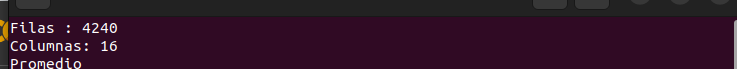

In [55]:
## cantidad de valores NaN
heart_new.isnull().sum()


male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [56]:
## Descripcion estadistica del dataframe
heart_new.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.00000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.02963,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.007075,0.500024,11.879230,0.16852,0.076587,0.462763,0.158316,44.326453,22.038097,11.910850,4.070953,12.025177,22.836603,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.00000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.00000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


**Resultado en C++**

*Promedios de las columnas*



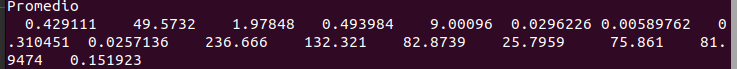

In [57]:
## divir en x_train, x_test, y_train, y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(heart_new.drop('TenYearCHD', axis=1), heart_new['TenYearCHD'], test_size=0.2, random_state=0)


In [58]:
## Se imprime tamaño de los datos de entrenamiento y prueba
print('Tamaño de X_train: ',X_train.shape)
print('Tamaño de X_test: ',X_test.shape)
print('Tamaño de y_train: ',y_train.shape)
print('Tamaño de y_test: ',y_test.shape)

Tamaño de X_train:  (3390, 15)
Tamaño de X_test:  (848, 15)
Tamaño de y_train:  (3390,)
Tamaño de y_test:  (848,)


**Resultado en C++**

*Tamaño entrenamiento y prueba*


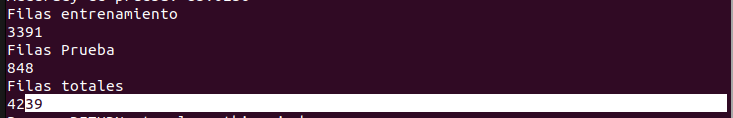

In [59]:
## normalizacion de datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



In [60]:
## Se importa el modelo de regresion logistica
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

LogisticRegression()

In [61]:
##clasificar todo nuestro conjunto de entradas X utilizando el método “predict(X)” y revisamos algunas de sus salidas y 
## vemos que coincide con las salidas 
prediccion=logisticRegr.predict(X_test)
print(prediccion)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [62]:
## Se realiza la confirmación de que tan bueno es el modelo
logisticRegr.score(X_test,y_test)*100

84.55188679245283

In [63]:
## Se realizan predicciones con el modelo
prediccion_p = logisticRegr.predict(X_test)
print(accuracy_score(y_test, prediccion_p)*100)

84.55188679245283


**Resultado en C++**

*Accuracy*


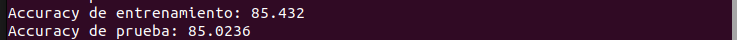

In [64]:
## gradiente descendiente
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)


SGDClassifier()

In [65]:
sgd.score(X_test, y_test)*100

83.84433962264151

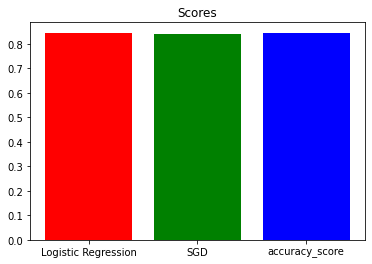

In [66]:
## grafica con los scores de los anteriores modelos con diferentes colores 
scores = [logisticRegr.score(X_test, y_test), sgd.score(X_test, y_test), accuracy_score(y_test, prediccion_p)]
labels = ['Logistic Regression', 'SGD','accuracy_score']
plt.bar(labels, scores, color=['red', 'green','blue'])
plt.title('Scores')
plt.show()


In [67]:
## Se realiza la matriz de confusión
from sklearn.metrics import confusion_matrix
matriz_confusion = confusion_matrix(y_test, prediccion)
print(matriz_confusion)



[[708   2]
 [129   9]]


In [68]:
## Se realiza el reporte de clasificación con su respectiva matriz de confusión
## metrica de rendimiento
from sklearn.metrics import classification_report
print(classification_report(y_test, prediccion))


              precision    recall  f1-score   support

           0       0.85      1.00      0.92       710
           1       0.82      0.07      0.12       138

    accuracy                           0.85       848
   macro avg       0.83      0.53      0.52       848
weighted avg       0.84      0.85      0.79       848



# Conclusiones

 >  Es mas rapido en C++ ya que este ofrece una mayor capacidad procesamiento de datos. 

 >Se puede envidenciar que la metrica recall es una de las mas eficientes a la hora de predecir los valores del modelo  ya que presenta un 100%  de si presentar el Riesgo en 10 años de cardiopatía coronaria.  

 >  En precision se puede evidenciar que se presenta  una poca diferencia en la acertación del modelo  si se presentara el riesgo de cardiopatía o no .

 > Se pudo envidenciar todo lo visto en clase de como funciona scikit-learn en pyhton  mediante la programación en C++ para asi poder realizar una comparación con cual de las dos es mas eficiente en el procesamiento de datos.

**Referencias**


[Regresión logística con Python](https://www.cienciadedatos.net/documentos/py17-regresion-logistica-python.html)

[Scikit-Learn](https://scikit-learn.org/stable/modules/sgd.html#regression)
